In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import astropy.units as u
from scipy.optimize import curve_fit

In [2]:
# df = pd.read_csv('simbad_full.csv', index_col='TYPED_ID')
df = pd.read_csv('./simbad_all_A0V_ext3.csv', index_col='name', skipinitialspace=True)
df.index.name = None
df

,RA,DEC,QualN,Band,Qual,BibCoo,PMRA,PMDEC,PMQualN,PMQual,...,FLUX_I,FLUX_J,FLUX_H,FLUX_K,None,SP_TYPE,SPQual,BibSP,25s,1.5m
BD+35 4414,21 09 13.218,+36 20 50.00,7,Opt,B,2009yCat.1315....0Z,0.500,-4.300,1.0,B,...,NaN,9.591,9.567,9.569,NaN,A0V,D,NaN,1.0,2.0
BD+38 4388,21 12 27.1038761610,+39 01 32.645315022,14,Opt,A,2018yCat.1345....0G,1.020,-3.473,3.0,A,...,NaN,10.495,10.459,10.467,NaN,A0V,D,NaN,1.0,1.0
HIP 105624,21 23 35.5297106889,+40 01 07.021382015,14,Opt,A,2018yCat.1345....0G,28.323,7.651,3.0,A,...,NaN,6.896,6.873,6.840,NaN,A0V,D,NaN,1.0,1.0
BD+37 4316,21 27 25.3852717278,+38 37 33.193081980,14,Opt,A,2018yCat.1345....0G,-2.308,-5.080,3.0,A,...,NaN,10.263,10.227,10.191,NaN,A0V,D,NaN,1.0,1.0
HD 9711,01 35 58.0262091977,+43 29 28.454920019,14,Opt,A,2018yCat.1345....0G,7.151,-5.772,3.0,A,...,NaN,9.706,9.653,9.612,NaN,A0V,C,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD 63361,07 47 32.8548604281,-27 14 45.658792314,14,Opt,A,2018yCat.1345....0G,-2.855,3.143,3.0,A,...,NaN,10.198,10.210,10.156,NaN,A0V,C,NaN,1.0,1.0
CD-29 15108,18 34 47.0225522639,-29 13 37.228858797,14,Opt,A,2018yCat.1345....0G,1.839,-0.010,3.0,A,...,NaN,10.054,9.961,9.909,NaN,A0V,D,1964AJ.....69..104M,1.0,1.0
TYC 8195-26-1,10 15 26.5576118447,-51 39 04.136926931,14,Opt,A,2018yCat.1345....0G,-8.496,3.694,3.0,A,...,NaN,11.626,11.554,11.491,NaN,A0V,C,NaN,1.0,1.0
CD-32 13093,17 40 06.8713889393,-32 13 50.703396623,14,Opt,A,2018yCat.1345....0G,-0.924,-5.400,3.0,A,...,NaN,9.895,9.810,9.802,NaN,A0V,C,2016AJ....151...49K,1.0,5.0


In [3]:
pre_result = pd.DataFrame(index=df.index)
mask = pd.DataFrame(index=df.index)

In [4]:
df.columns

Index(['RA', 'DEC', 'QualN', 'Band', 'Qual', 'BibCoo', 'PMRA', 'PMDEC',
       'PMQualN', 'PMQual', 'BibPM', 'PLX_VALUE', 'PLXQual', 'PLXerr',
       'BibPLX', 'OTYPE', 'FLUX_U', 'FLUX_B', 'FLUX_V', 'FLUX_R', 'FLUX_I',
       'FLUX_J', 'FLUX_H', 'FLUX_K', 'None', 'SP_TYPE', 'SPQual', 'BibSP',
       '25s', '1.5m'],
      dtype='object')

In [5]:
df.columns

Index(['RA', 'DEC', 'QualN', 'Band', 'Qual', 'BibCoo', 'PMRA', 'PMDEC',
       'PMQualN', 'PMQual', 'BibPM', 'PLX_VALUE', 'PLXQual', 'PLXerr',
       'BibPLX', 'OTYPE', 'FLUX_U', 'FLUX_B', 'FLUX_V', 'FLUX_R', 'FLUX_I',
       'FLUX_J', 'FLUX_H', 'FLUX_K', 'None', 'SP_TYPE', 'SPQual', 'BibSP',
       '25s', '1.5m'],
      dtype='object')

In [6]:
df = df.astype({'FLUX_B':"float",'FLUX_V':"float",'FLUX_J':"float",'FLUX_K':"float",'PLX_VALUE':"float"})

In [7]:
pre_result["CRITERIA"] = ""
pre_result = pre_result.astype({"CRITERIA": "string"})

### Параметры для отсеивания

In [8]:
#filter parameters
filPar = dict()
filPar['B-V'] = 0.1
filPar['J-K'] = 0.05
filPar['SP_TYPE'] = ['A0V','A0.0V']
filPar['OTYPE'] = ['Star','PM*']
filPar['Mv'] = [-0.5, 1.5]

### Покраснение

In [9]:
pre_result["B-V"] = df["FLUX_B"] - df["FLUX_V"]

mask["E(B-V)"] = (np.abs(pre_result["B-V"] + 0.02) > filPar['B-V'])

print(len(pre_result[mask["E(B-V)"]]))
pre_result[mask["E(B-V)"]]

3002


,CRITERIA,B-V
BD+35 4414,,0.09
BD+38 4388,,0.12
HIP 105624,,0.12
BD+37 4316,,0.15
BD+39 4409,,0.22
...,...,...
HD 63361,,0.15
CD-29 15108,,0.26
TYC 8195-26-1,,0.22
CD-32 13093,,0.13


In [10]:
pre_result["CRITERIA"][mask["E(B-V)"]] += "E(B-V)>{};".format(filPar['B-V'])

In [11]:
pre_result["J-K"] = df["FLUX_J"] - df["FLUX_K"]

mask["E(J-K)"] = np.abs(pre_result["J-K"] - 0.01) > filPar['J-K']

print(len(pre_result[mask["E(J-K)"]]))
pre_result[mask["E(J-K)"]]

3106


,CRITERIA,B-V,J-K
BD+37 4316,E(B-V)>0.1;,0.15,0.072
HD 9711,,0.05,0.094
V* AD And,E(B-V)>0.1;,0.20,0.128
NGC 7243 471,,0.06,0.074
NGC 7243 510,E(B-V)>0.1;,0.20,0.070
...,...,...,...
TYC 3973-814-1,E(B-V)>0.1;,0.43,0.145
TYC 4052-842-1,E(B-V)>0.1;,-0.34,0.185
CD-29 15108,E(B-V)>0.1;,0.26,0.145
TYC 8195-26-1,E(B-V)>0.1;,0.22,0.135


In [12]:
pre_result["CRITERIA"][mask["E(J-K)"]] += "E(J-K)>{};".format(filPar['J-K'])

### Спектральный класс

In [13]:
pre_result["SP_TYPE"] = df["SP_TYPE"]
df = df.astype({"SP_TYPE": "string"})

mask["SP_TYPE"] = ~(pre_result["SP_TYPE"].isin(filPar['SP_TYPE']))
set(pre_result["SP_TYPE"][mask["SP_TYPE"]].to_list())

set()

In [14]:
print(len(pre_result[mask["SP_TYPE"]]))
pre_result[mask["SP_TYPE"]]

0


,CRITERIA,B-V,J-K,SP_TYPE


In [15]:
pre_result["CRITERIA"][mask["SP_TYPE"]] += ("SPTYPE="+pre_result["SP_TYPE"][mask["SP_TYPE"]]+";")

### Нестандартный тип

In [16]:
pre_result['OTYPE'] = df["OTYPE"]
otypes = set(pre_result['OTYPE'].to_list())
otypes

{'**',
 'Ae*',
 'Be*',
 'BlueStraggler',
 'EB*',
 'EB*Algol',
 'EB*WUMa',
 'EB*betLyr',
 'EllipVar',
 'Em*',
 'Eruptive*',
 'HB*',
 'HV*',
 'Orion_V*',
 'PM*',
 'PulsV*',
 'PulsV*delSct',
 'RGB*',
 'RRLyr',
 'RSCVn',
 'RotV*',
 'RotV*alf2CVn',
 'SB*',
 'Star',
 'TTau*',
 'V*',
 'V*?',
 'YSO'}

In [17]:
for i in otypes:
    print(i)
    loc_mask = (pre_result['OTYPE'] == i)
    print(len(pre_result[loc_mask]))
    print(pre_result.index[loc_mask].to_list())
    print(' ')

EB*Algol
36
['HIP 107083', 'HIP  12906', 'HIP  82884', 'HD  40640', 'HD 261717', 'HD  51082', 'HIP  35447', 'HIP  38945', 'HIP  38581', 'HIP  39390', 'HIP  42457', 'HIP  45945', 'HIP  47427', 'HIP  61836', 'HIP  65896', 'HD 176149', 'HD 155534', 'HD 177994', 'HIP  73473', 'HD 143213', 'HIP  92177', 'HD 191515', 'HIP  87643', 'HD  70196', 'HD  65293', 'HIP  45079', 'HD  79459', 'HIP  14703', 'HD  85482', 'HD  83061', 'HD  91646', 'HD  92262', 'HD 108627', 'HIP  61882', 'HIP  72032', 'HD 161348']
 
RotV*
11
['HIP  78099', 'HIP  80464', 'BD+39  3639', 'HD 225570', 'TYC 3138-1041-1', 'HD 226050', 'TYC 3140-53-1', 'TYC 3149-461-1', 'TYC 3556-3283-1', 'UCAC4 443-021720', 'HIP  79192']
 
EB*betLyr
13
['V* AD And', 'V* MN Cas', 'HIP 106226', 'HIP  32549', 'HD  57802', 'HIP 105437', 'HIP  98893', 'HIP 101748', 'HD  69951', 'HIP  48155', 'HIP  52816', 'HIP  47591', 'HIP   2731']
 
V*
27
['HD  17358', 'TYC 4047-1931-1', 'SV* WR    76', 'HIP 102208', 'HIP  24927', 'HIP  30967', 'HD  53786', 'HD  6

In [18]:
mask["OTYPE"] = ~(pre_result["OTYPE"].isin(filPar['OTYPE']))

print(len(pre_result[mask["OTYPE"]]))
pre_result[mask["OTYPE"]]

424


,CRITERIA,B-V,J-K,SP_TYPE,OTYPE
BD+35 4414,E(B-V)>0.1;,0.090,0.022,A0V,**
V* AD And,E(B-V)>0.1;E(J-K)>0.05;,0.200,0.128,A0V,EB*betLyr
HIP 102619,,0.050,-0.010,A0V,**
HIP 106393,E(J-K)>0.05;,-0.034,-0.055,A0V,**
HIP 101452,,0.038,-0.006,A0V,SB*
...,...,...,...,...,...
UCAC4 443-021179,E(B-V)>0.1;E(J-K)>0.05;,0.310,0.180,A0V,V*
UCAC4 452-021735,E(B-V)>0.1;E(J-K)>0.05;,0.300,0.165,A0V,V*
HIP 79192,E(B-V)>0.1;E(J-K)>0.05;,0.170,0.069,A0V,RotV*
HD 125778,E(J-K)>0.05;,0.060,0.069,A0V,EB*


In [19]:
pre_result["CRITERIA"][mask["OTYPE"]] += ("OTYPE="+pre_result["OTYPE"][mask["OTYPE"]]+";")

### Звёзды в полосе экстракции

In [20]:
pre_result['25s'] = df['25s'] - 1

mask['25s'] = (pre_result["25s"] > 0)
print(len(pre_result[mask['25s']]))
pre_result[mask["25s"]]

576


,CRITERIA,B-V,J-K,SP_TYPE,OTYPE,25s
HIP 7927,E(B-V)>0.1;,0.160,0.048,A0V,Star,1.0
HD 9726,,0.040,0.046,A0V,Star,1.0
NGC 7243 510,E(B-V)>0.1;E(J-K)>0.05;,0.200,0.070,A0V,Star,2.0
HIP 102619,OTYPE=**;,0.050,-0.010,A0V,**,1.0
HIP 103222,E(J-K)>0.05;,-0.070,-0.073,A0V,Star,2.0
...,...,...,...,...,...,...
HD 143320,E(B-V)>0.1;E(J-K)>0.05;,0.310,0.235,A0V,Star,1.0
HD 145359,E(B-V)>0.1;E(J-K)>0.05;,0.145,0.139,A0V,Star,1.0
HIP 79244,E(B-V)>0.1;E(J-K)>0.05;,0.140,0.172,A0V,Star,1.0
HD 74997A,,0.000,0.016,A0V,Star,2.0


In [21]:
pre_result["CRITERIA"][mask["25s"]] += (pre_result["25s"][mask["25s"]].astype('int').astype('string')+" close objects;")

### Абсолютная звёздная величина

In [22]:
pre_result["AMag"] = df["FLUX_V"] - 5*np.log10(1000/df["PLX_VALUE"]) + 5
pre_result["Amag_max"] = pre_result["AMag"] - 3.3*pre_result["B-V"]
pre_result["Amag_min"] = pre_result["AMag"] - 4*pre_result["B-V"]
pre_result["AMag"] =(pre_result["Amag_max"] + pre_result["Amag_min"])/2
pre_result=pre_result.drop(['Amag_min', 'Amag_max'], axis=1)
# pre_result

In [23]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [24]:
def gauss2(x, *p):
    A, mu, sigma, A2, mu2, sigma2 = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + A2*np.exp(-(x-mu2)**2/(2.*sigma2**2))

In [25]:
def get_graph(ds, b=13, r=None, h=None, t=None, xl=None, yl='N'):
    hist = np.histogram(ds, bins=b, range=r)
    hy = hist[0]
    hx = (hist[1][1:] + hist[1][:-1])/2
    plt.plot(hx, hy)
    
    p0 = [np.max(hy), np.mean(ds), np.std(ds)]
    
    coeff, var_matrix = curve_fit(gauss, hx, hy, p0=p0)
    print(coeff)
    
    gx = np.linspace(hist[1].min(), hist[1].max(), 100)
    gy = gauss(gx, *coeff)
    plt.plot(gx, gy)
    
    return(coeff)

In [43]:
def get_graph2(ds, b=13, r=None, h=None, t=None, xl=None, yl='N'):
    hist = np.histogram(ds, bins=b, range=r)
    hy = hist[0]
    hx = (hist[1][1:] + hist[1][:-1])/2
    plt.plot(hx, hy, label='Наблюдаемое распределение')
    
    p0 = [np.max(hy)/2, np.mean(ds), np.std(ds), np.max(hy)/2, np.mean(ds)/2, np.std(ds)]
    
    coeff, var_matrix = curve_fit(gauss2, hx, hy, p0=p0)
    print(coeff)
    
    gx = np.linspace(hist[1].min(), hist[1].max(), 100)
    gy = gauss(gx, *coeff[:3])
    gy2 = gauss(gx, *coeff[3:])
    plt.plot(gx, gy)
    plt.plot(gx, gy2)
    plt.plot(gx, gy+gy2, '--', label='Фитирование двумя гауссианами')
    print(np.sum(gy)/(np.sum(gy)+np.sum(gy2)))
    
    plt.ylabel("$N_{stars}$")
    plt.xlabel("$M_v$")
    plt.legend()
    
    return(coeff)

In [44]:
%matplotlib
# k1 = get_graph(pre_result["Amag_min"][~(mask["SP_TYPE"]|mask["OTYPE"])], b=20, t="Min", r=(-2.5,2.5))
# k2 = get_graph(pre_result["Amag_max"][~(mask["SP_TYPE"]|mask["OTYPE"])], b=20, t="Max", r=(-2.5,2.5))
k = get_graph2(pre_result["AMag"][~(mask["SP_TYPE"]|mask["OTYPE"])], b=21, t="Min", r=(-2.5,2.5))

Using matplotlib backend: TkAgg
[5.10668486e+02 1.16490123e+00 3.36977813e-01 4.53773718e+02
 5.19493018e-01 6.45435101e-01]
0.37031397266351285


[7.55569928e+02 8.71191424e-01 6.02280818e-01]


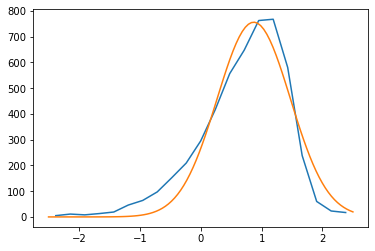

In [96]:
k = get_graph(pre_result["AMag"][~(mask["SP_TYPE"]|mask["OTYPE"])], b=21, t="Min", r=(-2.5,2.5))

In [40]:
# lowest_Mv = min(k1[1], k2[1]) - 1.5*max(k1[2], k2[2])
# highest_Mv = max(k1[1], k2[1]) + 1.5*max(k1[2], k2[2])
# # -0.006615049547368579
# # 1.7866078472469944
# lowest_Mv = np.percentile(pre_result["AMag"][~(mask["SP_TYPE"]|mask["OTYPE"])].dropna(), 10)
# highest_Mv = np.percentile(pre_result["AMag"][~(mask["SP_TYPE"]|mask["OTYPE"])].dropna(), 90)
# # -0.20232215578398002
# # 1.4567564060467357
# print(lowest_Mv)
# print(highest_Mv)

-0.13358831643413066
1.45567187990223


In [97]:
mask["Mv"] = ((pre_result["AMag"] < filPar['Mv'][0]) | (pre_result["AMag"] > filPar['Mv'][1]))

print(len(pre_result[mask["Mv"]]))
pre_result[mask["Mv"]]

873


,CRITERIA,B-V,J-K,SP_TYPE,OTYPE,25s,AMag
BD+38 4388,E(B-V)>0.1;,0.12,0.028,A0V,Star,0.0,1.650556
HD 9711,E(J-K)>0.05;,0.05,0.094,A0V,Star,0.0,2.431263
HIP 102619,OTYPE=**;1 close objects;,0.05,-0.010,A0V,**,1.0,-1.010231
BD+44 3626,E(B-V)>0.1;,0.08,0.054,A0V,Star,0.0,2.159302
BD+45 3300,E(B-V)>0.1;E(J-K)>0.05;,0.39,0.182,A0V,Star,0.0,-1.279350
...,...,...,...,...,...,...,...
TYC 3973-814-1,E(B-V)>0.1;E(J-K)>0.05;,0.43,0.145,A0V,Star,0.0,-1.258958
TYC 4052-842-1,E(B-V)>0.1;E(J-K)>0.05;,-0.34,0.185,A0V,Star,0.0,4.073521
V* V566 Ori,OTYPE=Orion_V*;6 close objects;,0.06,0.020,A0V,Orion_V*,6.0,1.769929
HD 63361,E(B-V)>0.1;,0.15,0.042,A0V,Star,0.0,-2.019052


In [98]:
pre_result["CRITERIA"][mask["Mv"]] += ("Mv="+(pre_result['AMag'][mask["Mv"]]).astype('string')+";")

### Яркие звёзды в поле подсмотра

In [99]:
pre_result['1.5m'] = df['1.5m'] - 1

mask['1.5m'] = (pre_result["1.5m"] > 0)
print(len(pre_result[mask['1.5m']]))
pre_result[mask["1.5m"]]

827


,CRITERIA,B-V,J-K,SP_TYPE,OTYPE,25s,AMag,1.5m
BD+35 4414,E(B-V)>0.1;OTYPE=**;,0.09,0.022,A0V,**,0.0,NaN,1.0
NGC 7243 471,E(J-K)>0.05;,0.06,0.074,A0V,Star,0.0,0.711524,1.0
HIP 103222,E(J-K)>0.05;2 close objects;,-0.07,-0.073,A0V,Star,2.0,-0.191015,1.0
TYC 4281-154-1,E(B-V)>0.1;E(J-K)>0.05;,0.29,0.101,A0V,Star,0.0,1.375758,1.0
HD 2745,E(B-V)>0.1;,0.21,0.059,A0V,Star,0.0,0.723568,1.0
...,...,...,...,...,...,...,...,...
HD 104650,E(B-V)>0.1;E(J-K)>0.05;,0.16,0.095,A0V,Star,0.0,0.150738,1.0
HD 113931,,-0.03,-0.010,A0V,Star,0.0,0.604163,1.0
HD 113913,E(B-V)>0.1;,0.08,-0.014,A0V,Star,0.0,0.660270,1.0
CD-32 13093,E(B-V)>0.1;E(J-K)>0.05;,0.13,0.093,A0V,Star,0.0,1.450582,4.0


In [100]:
pre_result["CRITERIA"][mask["1.5m"]] += (pre_result["1.5m"][mask["1.5m"]].astype('int').astype('string')+" close objects;")

### Итог

In [101]:
mask

,E(B-V),E(J-K),SP_TYPE,OTYPE,25s,Mv,1.5m
BD+35 4414,True,False,False,True,False,False,True
BD+38 4388,True,False,False,False,False,True,False
HIP 105624,True,False,False,False,False,False,False
BD+37 4316,True,True,False,False,False,False,False
HD 9711,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...
HD 63361,True,False,False,False,False,True,False
CD-29 15108,True,True,False,False,False,False,False
TYC 8195-26-1,True,True,False,False,False,False,False
CD-32 13093,True,True,False,False,False,False,True


In [102]:
# mask["Total"] = False

# for i in mask.columns:
#     mask["Total"] = (mask["Total"] | mask[i])

# pre_result[~mask["Total"]]

In [103]:
mask["N"] = 0
for i in mask.columns[:-1]:
    mask[i] = mask[i].astype("int")
    mask["N"] += mask[i]
mask

,E(B-V),E(J-K),SP_TYPE,OTYPE,25s,Mv,1.5m,N
BD+35 4414,1,0,0,1,0,0,1,3
BD+38 4388,1,0,0,0,0,1,0,2
HIP 105624,1,0,0,0,0,0,0,1
BD+37 4316,1,1,0,0,0,0,0,2
HD 9711,0,1,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...
HD 63361,1,0,0,0,0,1,0,2
CD-29 15108,1,1,0,0,0,0,0,2
TYC 8195-26-1,1,1,0,0,0,0,0,2
CD-32 13093,1,1,0,0,0,0,1,3


In [104]:
mask["Good"] = False
mask["Good"][mask["N"] == 0] = True
mask

<ipython-input-104-f24abef2cfb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask["Good"][mask["N"] == 0] = True


,E(B-V),E(J-K),SP_TYPE,OTYPE,25s,Mv,1.5m,N,Good
BD+35 4414,1,0,0,1,0,0,1,3,False
BD+38 4388,1,0,0,0,0,1,0,2,False
HIP 105624,1,0,0,0,0,0,0,1,False
BD+37 4316,1,1,0,0,0,0,0,2,False
HD 9711,0,1,0,0,0,1,0,2,False
...,...,...,...,...,...,...,...,...,...
HD 63361,1,0,0,0,0,1,0,2,False
CD-29 15108,1,1,0,0,0,0,0,2,False
TYC 8195-26-1,1,1,0,0,0,0,0,2,False
CD-32 13093,1,1,0,0,0,0,1,3,False


In [105]:
for i in mask.columns[:-1]:
    print(i, " ", np.sum(mask[i]), " ", len(mask[((mask["N"] - mask[i]) == 0) & (mask[i]==1)]))

E(B-V)   3002   796
E(J-K)   3106   751
SP_TYPE   0   0
OTYPE   424   78
25s   576   92
Mv   873   183
1.5m   827   68
N   8808   1968


In [106]:
df[mask["Good"]]

,RA,DEC,QualN,Band,Qual,BibCoo,PMRA,PMDEC,PMQualN,PMQual,...,FLUX_I,FLUX_J,FLUX_H,FLUX_K,None,SP_TYPE,SPQual,BibSP,25s,1.5m
HIP 109079,22 05 50.4496250472,+45 06 44.996802700,14,Opt,A,2018yCat.1345....0G,14.097,-4.188,3.0,A,...,NaN,6.528,6.595,6.559,NaN,A0V,C,NaN,1.0,1.0
HIP 114714,23 14 14.3815966698,+50 37 04.419701198,14,Opt,A,2018yCat.1345....0G,45.199,-5.922,3.0,A,...,NaN,6.297,6.315,6.321,NaN,A0V,C,NaN,1.0,1.0
HIP 10819,02 19 16.7969275675,+47 22 47.913234056,14,Opt,A,2018yCat.1345....0G,-60.030,-5.610,2.0,A,...,NaN,5.254,5.306,5.271,NaN,A0V,C,2009ApJ...694.1085V,1.0,1.0
BD+55 3061,23 58 11.6610186834,+55 50 24.014632471,14,Opt,A,2018yCat.1345....0G,8.420,-3.421,3.0,A,...,NaN,9.286,9.318,9.297,NaN,A0V,C,1985ApJS...59..197B,1.0,1.0
HIP 15925,03 25 09.3866012988,+41 15 26.281500352,14,Opt,A,2018yCat.1345....0G,-8.807,5.235,3.0,A,...,NaN,6.333,6.356,6.340,NaN,A0V,C,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD 177219,19 05 31.4635192202,-39 35 22.455472535,14,Opt,A,2018yCat.1345....0G,10.682,-6.944,3.0,A,...,NaN,8.168,8.205,8.184,NaN,A0V,C,1982MSS...C03....0H,1.0,1.0
HIP 92197,18 47 23.7051324464,-32 38 51.573681587,14,Opt,A,2018yCat.1345....0G,1.950,-6.713,3.0,A,...,NaN,8.610,8.684,8.618,NaN,A0V,C,1982MSS...C03....0H,1.0,1.0
HD 195225,20 30 58.2084598334,-26 58 32.198685514,14,Opt,A,2018yCat.1345....0G,2.856,-6.568,3.0,A,...,NaN,8.981,9.010,8.957,NaN,A0V,C,1982MSS...C03....0H,1.0,1.0
HIP 101384,20 32 52.3599276573,-24 56 37.779398250,14,Opt,A,2018yCat.1345....0G,8.548,-43.773,3.0,A,...,NaN,6.336,6.360,6.343,NaN,A0V,C,1988MSS...C04....0H,1.0,1.0


In [107]:
pre_result

,CRITERIA,B-V,J-K,SP_TYPE,OTYPE,25s,AMag,1.5m
BD+35 4414,E(B-V)>0.1;OTYPE=**;1 close objects;,0.09,0.022,A0V,**,0.0,NaN,1.0
BD+38 4388,E(B-V)>0.1;Mv=1.6505560249222864;,0.12,0.028,A0V,Star,0.0,1.650556,0.0
HIP 105624,E(B-V)>0.1;,0.12,0.056,A0V,Star,0.0,0.785492,0.0
BD+37 4316,E(B-V)>0.1;E(J-K)>0.05;,0.15,0.072,A0V,Star,0.0,0.640812,0.0
HD 9711,E(J-K)>0.05;Mv=2.4312634717407433;,0.05,0.094,A0V,Star,0.0,2.431263,0.0
...,...,...,...,...,...,...,...,...
HD 63361,E(B-V)>0.1;Mv=-2.0190517955051392;,0.15,0.042,A0V,Star,0.0,-2.019052,0.0
CD-29 15108,E(B-V)>0.1;E(J-K)>0.05;,0.26,0.145,A0V,Star,0.0,1.404852,0.0
TYC 8195-26-1,E(B-V)>0.1;E(J-K)>0.05;,0.22,0.135,A0V,Star,0.0,0.436781,0.0
CD-32 13093,E(B-V)>0.1;E(J-K)>0.05;4 close objects;,0.13,0.093,A0V,Star,0.0,1.450582,4.0


### Сохранение результатов

In [121]:
result_compact = pd.DataFrame(df[mask["Good"]])

In [122]:
# result_compact = result_compact.drop(["RA_PREC","DEC_PREC","COO_ERR_MAJA","COO_ERR_MINA","COO_ERR_ANGLE",
#                                       "COO_QUAL","COO_WAVELENGTH","COO_BIBCODE","OTYPES","PLX_VALUE",
#                                       "PLX_PREC","PLX_ERROR","SP_TYPE","SP_QUAL","SP_BIBCODE","OTYPE_S",
#                                       "PLX_QUAL","PLX_BIBCODE","25s","1.5m","PMRA_PREC","PMDEC_PREC",
#                                       "PM_ERR_MAJA","PM_ERR_MINA","PM_ERR_ANGLE","PM_QUAL","PM_BIBCODE",
#                                       "FLUX_U","FLUX_R","FLUX_I"], axis=1)
result_compact = result_compact.drop(["FLUX_U","FLUX_R","FLUX_I","QualN","Band","Qual","BibCoo",
                                      "PMQualN","PMQual","BibPM","PLXQual","PLXerr","BibPLX","None",
                                      "PLX_VALUE","SP_TYPE","SPQual","OTYPE","BibSP","25s","1.5m"], axis=1)
result_compact

,RA,DEC,PMRA,PMDEC,FLUX_B,FLUX_V,FLUX_J,FLUX_H,FLUX_K
HIP 109079,22 05 50.4496250472,+45 06 44.996802700,14.097,-4.188,6.458,6.494,6.528,6.595,6.559
HIP 114714,23 14 14.3815966698,+50 37 04.419701198,45.199,-5.922,6.300,6.310,6.297,6.315,6.321
HIP 10819,02 19 16.7969275675,+47 22 47.913234056,-60.030,-5.610,5.310,5.310,5.254,5.306,5.271
BD+55 3061,23 58 11.6610186834,+55 50 24.014632471,8.420,-3.421,9.530,9.510,9.286,9.318,9.297
HIP 15925,03 25 09.3866012988,+41 15 26.281500352,-8.807,5.235,6.550,6.520,6.333,6.356,6.340
...,...,...,...,...,...,...,...,...,...
HD 177219,19 05 31.4635192202,-39 35 22.455472535,10.682,-6.944,8.440,8.390,8.168,8.205,8.184
HIP 92197,18 47 23.7051324464,-32 38 51.573681587,1.950,-6.713,8.790,8.730,8.610,8.684,8.618
HD 195225,20 30 58.2084598334,-26 58 32.198685514,2.856,-6.568,9.140,9.080,8.981,9.010,8.957
HIP 101384,20 32 52.3599276573,-24 56 37.779398250,8.548,-43.773,6.340,6.339,6.336,6.360,6.343


In [123]:
result_compact = result_compact[["RA","DEC","PMRA","PMDEC","FLUX_B","FLUX_V","FLUX_J","FLUX_H","FLUX_K"]].sort_values(by=['DEC'])

In [124]:
result_compact = result_compact.dropna()

In [125]:
result_compact.to_csv('short_all.csv')

In [126]:
pre_result

,CRITERIA,B-V,J-K,SP_TYPE,OTYPE,25s,AMag,1.5m
BD+35 4414,E(B-V)>0.1;OTYPE=**;1 close objects;,0.09,0.022,A0V,**,0.0,NaN,1.0
BD+38 4388,E(B-V)>0.1;Mv=1.6505560249222864;,0.12,0.028,A0V,Star,0.0,1.650556,0.0
HIP 105624,E(B-V)>0.1;,0.12,0.056,A0V,Star,0.0,0.785492,0.0
BD+37 4316,E(B-V)>0.1;E(J-K)>0.05;,0.15,0.072,A0V,Star,0.0,0.640812,0.0
HD 9711,E(J-K)>0.05;Mv=2.4312634717407433;,0.05,0.094,A0V,Star,0.0,2.431263,0.0
...,...,...,...,...,...,...,...,...
HD 63361,E(B-V)>0.1;Mv=-2.0190517955051392;,0.15,0.042,A0V,Star,0.0,-2.019052,0.0
CD-29 15108,E(B-V)>0.1;E(J-K)>0.05;,0.26,0.145,A0V,Star,0.0,1.404852,0.0
TYC 8195-26-1,E(B-V)>0.1;E(J-K)>0.05;,0.22,0.135,A0V,Star,0.0,0.436781,0.0
CD-32 13093,E(B-V)>0.1;E(J-K)>0.05;4 close objects;,0.13,0.093,A0V,Star,0.0,1.450582,4.0


In [127]:
result_full = pd.DataFrame(df)
result_full

,RA,DEC,QualN,Band,Qual,BibCoo,PMRA,PMDEC,PMQualN,PMQual,...,FLUX_I,FLUX_J,FLUX_H,FLUX_K,None,SP_TYPE,SPQual,BibSP,25s,1.5m
BD+35 4414,21 09 13.218,+36 20 50.00,7,Opt,B,2009yCat.1315....0Z,0.500,-4.300,1.0,B,...,NaN,9.591,9.567,9.569,NaN,A0V,D,NaN,1.0,2.0
BD+38 4388,21 12 27.1038761610,+39 01 32.645315022,14,Opt,A,2018yCat.1345....0G,1.020,-3.473,3.0,A,...,NaN,10.495,10.459,10.467,NaN,A0V,D,NaN,1.0,1.0
HIP 105624,21 23 35.5297106889,+40 01 07.021382015,14,Opt,A,2018yCat.1345....0G,28.323,7.651,3.0,A,...,NaN,6.896,6.873,6.840,NaN,A0V,D,NaN,1.0,1.0
BD+37 4316,21 27 25.3852717278,+38 37 33.193081980,14,Opt,A,2018yCat.1345....0G,-2.308,-5.080,3.0,A,...,NaN,10.263,10.227,10.191,NaN,A0V,D,NaN,1.0,1.0
HD 9711,01 35 58.0262091977,+43 29 28.454920019,14,Opt,A,2018yCat.1345....0G,7.151,-5.772,3.0,A,...,NaN,9.706,9.653,9.612,NaN,A0V,C,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD 63361,07 47 32.8548604281,-27 14 45.658792314,14,Opt,A,2018yCat.1345....0G,-2.855,3.143,3.0,A,...,NaN,10.198,10.210,10.156,NaN,A0V,C,NaN,1.0,1.0
CD-29 15108,18 34 47.0225522639,-29 13 37.228858797,14,Opt,A,2018yCat.1345....0G,1.839,-0.010,3.0,A,...,NaN,10.054,9.961,9.909,NaN,A0V,D,1964AJ.....69..104M,1.0,1.0
TYC 8195-26-1,10 15 26.5576118447,-51 39 04.136926931,14,Opt,A,2018yCat.1345....0G,-8.496,3.694,3.0,A,...,NaN,11.626,11.554,11.491,NaN,A0V,C,NaN,1.0,1.0
CD-32 13093,17 40 06.8713889393,-32 13 50.703396623,14,Opt,A,2018yCat.1345....0G,-0.924,-5.400,3.0,A,...,NaN,9.895,9.810,9.802,NaN,A0V,C,2016AJ....151...49K,1.0,5.0


In [128]:
result_full['B-V'] = pre_result['B-V']
result_full['J-K'] = pre_result['J-K']
result_full['Mv'] = pre_result['AMag']
result_full['CRITERIA'] = pre_result['CRITERIA']
result_full

,RA,DEC,QualN,Band,Qual,BibCoo,PMRA,PMDEC,PMQualN,PMQual,...,None,SP_TYPE,SPQual,BibSP,25s,1.5m,B-V,J-K,Mv,CRITERIA
BD+35 4414,21 09 13.218,+36 20 50.00,7,Opt,B,2009yCat.1315....0Z,0.500,-4.300,1.0,B,...,NaN,A0V,D,NaN,1.0,2.0,0.09,0.022,NaN,E(B-V)>0.1;OTYPE=**;1 close objects;
BD+38 4388,21 12 27.1038761610,+39 01 32.645315022,14,Opt,A,2018yCat.1345....0G,1.020,-3.473,3.0,A,...,NaN,A0V,D,NaN,1.0,1.0,0.12,0.028,1.650556,E(B-V)>0.1;Mv=1.6505560249222864;
HIP 105624,21 23 35.5297106889,+40 01 07.021382015,14,Opt,A,2018yCat.1345....0G,28.323,7.651,3.0,A,...,NaN,A0V,D,NaN,1.0,1.0,0.12,0.056,0.785492,E(B-V)>0.1;
BD+37 4316,21 27 25.3852717278,+38 37 33.193081980,14,Opt,A,2018yCat.1345....0G,-2.308,-5.080,3.0,A,...,NaN,A0V,D,NaN,1.0,1.0,0.15,0.072,0.640812,E(B-V)>0.1;E(J-K)>0.05;
HD 9711,01 35 58.0262091977,+43 29 28.454920019,14,Opt,A,2018yCat.1345....0G,7.151,-5.772,3.0,A,...,NaN,A0V,C,NaN,1.0,1.0,0.05,0.094,2.431263,E(J-K)>0.05;Mv=2.4312634717407433;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HD 63361,07 47 32.8548604281,-27 14 45.658792314,14,Opt,A,2018yCat.1345....0G,-2.855,3.143,3.0,A,...,NaN,A0V,C,NaN,1.0,1.0,0.15,0.042,-2.019052,E(B-V)>0.1;Mv=-2.0190517955051392;
CD-29 15108,18 34 47.0225522639,-29 13 37.228858797,14,Opt,A,2018yCat.1345....0G,1.839,-0.010,3.0,A,...,NaN,A0V,D,1964AJ.....69..104M,1.0,1.0,0.26,0.145,1.404852,E(B-V)>0.1;E(J-K)>0.05;
TYC 8195-26-1,10 15 26.5576118447,-51 39 04.136926931,14,Opt,A,2018yCat.1345....0G,-8.496,3.694,3.0,A,...,NaN,A0V,C,NaN,1.0,1.0,0.22,0.135,0.436781,E(B-V)>0.1;E(J-K)>0.05;
CD-32 13093,17 40 06.8713889393,-32 13 50.703396623,14,Opt,A,2018yCat.1345....0G,-0.924,-5.400,3.0,A,...,NaN,A0V,C,2016AJ....151...49K,1.0,5.0,0.13,0.093,1.450582,E(B-V)>0.1;E(J-K)>0.05;4 close objects;


In [129]:
for i in mask.columns:
    result_full["MASK_"+i] = mask[i]
result_full.sort_values(by=["MASK_N","DEC"]).to_csv('full_all.csv')